In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
from tqdm import tqdm
from mappings import get_element_mapping, get_item_mapping, get_area_mapping
from utils import load_dataframe, get_element_from_mapping, reshape_dataframe, percentage_of_total

# Constructing a diet based on nutrient needs

### Some essential nutrients

https://www.sciencedirect.com/science/article/pii/S2542519617300074

A first list of essential nutrients:
- Vitamin A
- Vitamin B12
- Folate
- Iron
- Zinc
- Calcium
- Protein and calories as macronutrients

These nutrients are deemed to be essential not only because of their paramount importance to a healthy diet but also because of the fact that there exists widespread deficiencies worldwide.


### Diet diversity
Nutrients are contained in different quantities in different commodities; for example:
- roots and tubers contain a lot of vitamin A but a low amount of protein
- livestock and fish contain a lot of protein and vitamin B12
- some nutrients are generally harder to come by than others

Therefore a healthy diet requires food intake diversity.

Diversity is also important from an agricultural point of view; different types of crops or different species of a given crop will have less chance of all being wiped out by a single disease. 

### Malnutrition

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2442550/

The first cause of death by malnutrition is caused by a lack of protein. The most common mineral deficiency is iron deficiency.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3546624/

Different regions have different diets and different deficiencies. In the USA for example, the nutrients that are under-consumed are fiber, calcium, vitamin D and potassium. However, in less-developped countries, there are a lot of iron and protein deficiencies.


### Plants nutrients
While plants contain a lot of fibers and carbohydrates, they have a poor balance of essential amino acids and have a low protein content. For example, cereals tend to be low in Lys (lysine) content, and legumes tend to be low in sulfur-rich amino acids (methionine, cysteine). It is important to note that manufacturing amino acids is costly, therefore manufacturing and distributing amino acids is not a feasible solution as of now. 

Another important point to consider is that some foods also contain anti-nutrients, allergens or toxins. A good example of this is phytate-containing plants. Phytate chelates iron, calcium and zinc which are essential nutrients. Therefore its positive impacts could be nefated by the fact that it impedes other nutrients from being properly incroporated by the human body.

### Meat nutrients
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6213018/	
Although its overconsumption is an issue, meat is a major source of micro and macro nutrients, contains all essential amino acids and has overall high nutritional value. Its content in iron, zinc, vitamins B1 and B12, niacin, protein and vitamins A and D is high, with good amino acid digestibility (e.g. when compared to plants).
Food group:
- Energy
- Protein, total fat, fatty acids (SFA, MUFA< PUFA), cholesterol
- Micronutirents (iron, zinc, sodium, phosphorus, calcium, copper, magnesium)
- Vitamins (vitamin A, vitamin D, thiamin, riboflavin, niacin, vitaamin B6, vitamin B12, vitamin E)


### Meat vs. plants:
https://www.ncbi.nlm.nih.gov/pubmed/28532520

Moreover, plants are a fairly poor substitute for some of the nutrients meat provides. For example, iron and zinc contents in plants are very low. Their absorption Is further reduced in phytate-containing plants. The main nutrients plants lack in high quantities are Vitamin A, Thiamin, Vitamin B12, zince, Calcium.

A diet relying more on plants rather than solely on meat is in accordance with most health councils and organizations. 
Vitamin B12 is mainly found in meat. Vitamin A is mainly found in butter, liver, and in carotenoids to some extent. Thiamin is found in meat and dairy, and cereals to a lesser extent. Calcium is mainly found in milk dairy, and cereals and vegetables to a much lesser extent. 

### Why we have chosen to include both meat and plants
http://www.fao.org/3/T0207E04.htm

An in-depth example of why food diversity is important to a healthy diet:
Roots and tubers provide energy mostly through carbohydrates and have fiber content, but contain a low amount of protein and only contain Sulphur-containing amino acids. Although some plants, such as sweet potato and yams contain vitamin C, and Taro contains potassium, plants overall provide these in fairly low quantities. The lipid content is very low in plants, and they are therefore also not a good source of fat soluble vitamins. Roots and tubers contain enough potassium, and not enough sodium. However, many diets tend to restrict sodium intake. 

Meat production is known to be more polluting and requires more land than plant production. However, we choose to consider both of these; first of all because in a real-world application it has proven difficult to transition meat production into plant production, second because meat yields interesting nutrient value, and third because the scope of our project is not based on how animals are treated/health impact of meat consumption/other issues of meat production.

https://academic.oup.com/ajcn/article/78/3/660S/4690010
However, we will still try to have a mostly plant-based diet, reducing overall meat production. This should not be too much of a problem, seeing as more than half of the world's population already lives on a mostly plant-based diet.


## Creating a nutrient list
Detailed list of essential nutrients:
- Macronutrients
    - Proteins
    - Carbohydrates
    - Fibers
    - Lipids
    - Vitamins and minerals
        - Vitamins: 
            - vitamin B9 / folate
            - vitamin E
            - vimatin B6
            - vitamin C
            - vitamin A
            - vitamin B12
            - vitamin D
        - Minerals : 
            - iron
            - calcium
            - selenium
            - iodine
    - Functional metabolites:
        - Nonprovitamin A
        - Carotenoids
        - Glucosinolates
        - phytoestrogens
    - Antinutrients, allergens, toxins
        - Phytate

Some of these can be easily manufactured and distributed (e.g. iodine). We will only focus on a subset of nutrients, and look at protein content, fiber content, lipid content, vitamin content and mineral content of given foods in order to construct a "healthy" diet (meaning one that provides good nutrient intake).
## What we will take into consideration for now:

- Proteins
- Carbohydrates
- Fibers
- Lipids
- Vitamins and minerals
    - Vitamins: A, B6, B9, B12, C, D, E
    - Minerals : Fe, Ca
    
    
# Getting an idea of nutrient quantities

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5346408/

The daily reference values for a healthy diet for children and adults contains both nutrients to encourage and those to limit.

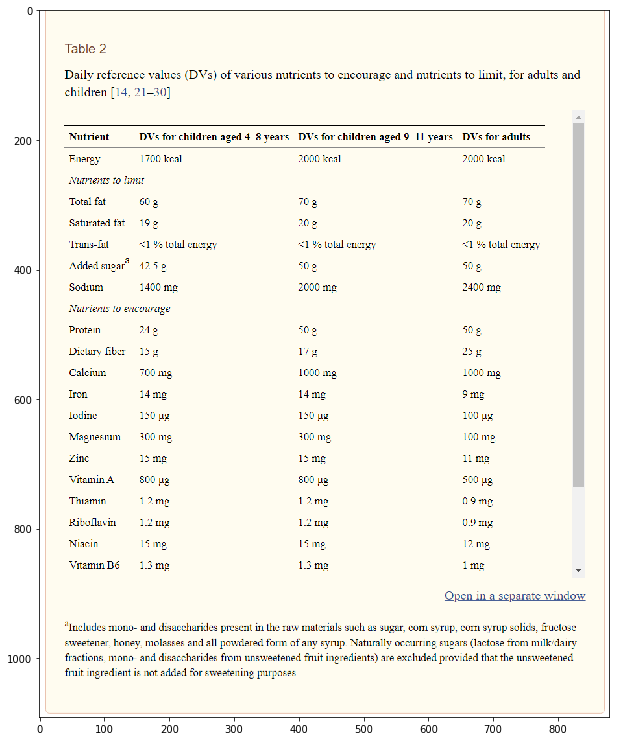

In [113]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
img = mpimg.imread('data\\nutrients_daily.png') 
fig, ax = plt.subplots(figsize=(13,13))
ax.imshow(img) 

# Issues that we will not address regarding food and health

http://www.fao.org/3/ca6030en/ca6030en.pdf

Some issues that we will not address regarding food security are food waste, food distribution optimization and food processing (e.g. cooking a certain way to preserve nutrients).

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3546624/

Another issue lies in the health implications of each food. For example, red meat has been linked to some extent with different health issues when consumed in great quantities. This further reinforces the idea of having a diverse diet and not relying on a single type of food. However, we will not investigate this in great details, and rely on the fact that the food we are investigating is not lethal in reasonable quantities (e.g. sugar consumed in normal quantities vs. sugar over-consumption), and that a diet should evidently contain many different types of food to be "healthy".


### Shortcomings 
Also, obviously, we are not taking into consideration all facets of a healthy diet. Different people have different needs and wants. We are only providing a possible example of a world-agricultural model that has a lower impact on environment while having a better impact on world nutrition.


# Nutrient value database
In parallel with the evaluation of the environmental impact of livestock and crops, we need to decide which food yield the best (or at least a good/healthy enough) nutritive value. 
To do this, after having decided on certain categories of nutrients (vitamins / fibers / etc...), we will check that the nutrients that we plan on using contain enough nutritive value using this database:

https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/

Files:

Ingredient Nutrient Values.xlsx

FNDDS Nutrient Values.xlsx

In [3]:
dirname = os.getcwd()+ "\\data\\nutrients"
os.listdir(dirname)

['FNDDS_Nutrient_Values.xlsx', 'Ingredient_Nutrient_Values.xlsx']

In [4]:
food_attr = pd.read_excel(dirname+"\\FNDDS_Nutrient_Values.xlsx", header = 1)

In [5]:
food_nutrient = pd.read_excel(dirname+"\\Ingredient_Nutrient_Values.xlsx", header = 1 )

In [6]:
# food_nutrient["SR description"].unique()
food_nutrient = food_nutrient.drop(["Ingredient code", "Nutrient code", "Nutrient value source", "SR 28 derivation code", "SR 28 AddMod year"], axis = 1)
food_nutrient.columns = ["ingredient","nutrient","value"]
print(food_nutrient.ingredient.nunique(), food_nutrient.nutrient.nunique())

2730 65


In [135]:
nutrient_list = list(food_nutrient.nutrient.unique())
selected_nutrients = ["Protein","Total Fat","Carbohydrate","Energy","Water",\
                      "Fiber, total dietary","Iron",\
                      "Calcium", "Vitamin C","Vitamin B-6",\
                      "Vitamin B-12","Vitamin A, RAE","Vitamin E (alpha-tocopherol)"\
                      ,"Vitamin D (D2 + D3)"]
set(selected_nutrients) - set(nutrient_list)

set()

### An example of how we could use this dataset:
First we would need to isolate certain food components based on environmental and agricultural considerations, Tand only then would we cross-check these components with the database here to make sure that they contain the necessary nutrients. 

In [183]:
# # food_nutrient[food_nutrient.nutrient == "Calcium"].sort_values("value", ascending = False).head()
df = pd.DataFrame(columns = ["name","value","item"])
for idx, val in enumerate(selected_nutrients):
    max_val= food_nutrient[food_nutrient.nutrient == val].value.max()
    max_item = food_nutrient[food_nutrient.nutrient ==val].value.idxmax()
    max_item = food_nutrient.iloc[max_item]
    df.loc[idx] = val, max_val, max_item
df
# here: issue with vitamin D value. 
# also: the max value is often a supplement / else...
# that's why it would be best used as a cross-checking tool
# since this is not our original database, we're not going to spend ages cleaning / arranging it. 

,name,value,item
0,Protein,88.32,ingredient Soy protein isolate nutrient ...
1,Total Fat,100.00,"ingredient Fat, beef tallow nutrient ..."
2,Carbohydrate,100.00,"ingredient Sweetener, herbal extract powder..."
3,Energy,902.00,"ingredient Fat, beef tallow nutrient ..."
4,Water,99.98,"ingredient Water, bottled, generic nutrient..."
5,"Fiber, total dietary",53.20,"ingredient Spices, curry powder nutrient ..."
6,Iron,123.60,"ingredient Spices, thyme, dried nutrient ..."
7,Calcium,7364.00,"ingredient Leavening agents, baking powder,..."
8,Vitamin C,2400.00,"ingredient Fruit-flavored drink, powder, wi..."
9,Vitamin B-6,12.00,"ingredient Cereals ready-to-eat, KELLOGG, K..."


# Fertilizer use
https://www.earth.columbia.edu/articles/view/3281

The increased use of fertilizer has a strong impact on the environment, however it does generally help agriculture. It is also deemed necessary in many regions, and many reports highlight the fact that in order to feed the whole population, the quantity of fertilizer use must increase. However, it needs to be regulated, and a lot of areas could use a lesser amount. A direct consequence of high fertilizer use is the formation of excess nitrogen areas e.g. in rivers or lakes.

https://en.wikipedia.org/wiki/Rice#Nutrition

Obviously, some crops and products require more fertilizer than others. An example of this is rice cultivation, which requires large amounts of area, water and 
fertilizers. Rice yields good energy, protein and carbohydrate nutritive value, but relatively low water, fat and fiber contents when compared to other staple foods such as maize, wheat or potatoes. Since rice is the most consumed food in the world, being the main diet ingredient of approximately half of the world's population. Therefore we want to investigate whether rice is a good agricultural choice both in terms of environmental impact and nutritive value at a worldwide scale.

# Agriculture Sectors Pollution
https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions

Greenhouse gases basically trap heat and contribute to global warming. GHGs are almost entirely antropogenic.
- C02: carbon dioxide. Deforestation, land clearing for agriculture and soil degradation impacts CO2 release in the air
- CH4: methane. Most agriculture practices, agricultural waster, biomass burning, and livestock impact CH4 release in the air.
- N20: Nitrous oxide. Fertilizer use is the main culrpit here, impacting N20 release in the air.

However, agricultural practices also have some positive impact on GHG release: some ecosystems offset part of CO2 emissions.

In [186]:
# plot emissions ch4 / n20 
dirname = os.getcwd() + "\\data_cleaned"

In [185]:
load

'C:\\Users\\theop\\OneDrive\\Documents\\GitHub\\ADA_Project\\data'